In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
g = nx.read_gexf('graph.gexf')

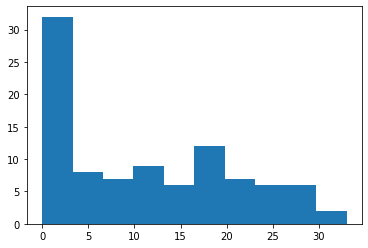

In [ ]:
degrees = [g.degree(v) for v in g.nodes()]
plt.hist(degrees)
plt.show()

In [ ]:
g.remove_nodes_from(list(nx.isolates(g)))

In [ ]:
largest_cc = max(nx.connected_components(g), key=len)

In [ ]:
S = g.subgraph(largest_cc)

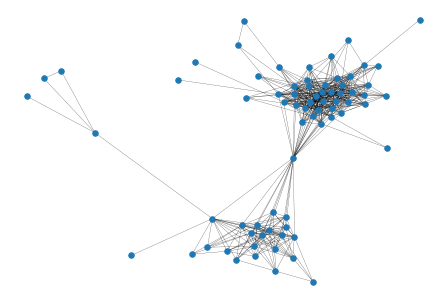

In [ ]:
networkx.draw(S, node_size=30, with_labels=False, width=0.2)

In [ ]:
print(f"eccentricity: {nx.eccentricity(S)}")
print(f"radius: {nx.radius(S)}")
print(f"diameter: {nx.diameter(S)}")

eccentricity: {'8867228': 4, '31144969': 5, '68474465': 4, '71213401': 4, '72323949': 4, '96115510': 4, '150586434': 4, '152790725': 4, '155614136': 5, '155811528': 4, '168120793': 5, '171871581': 5, '172959174': 5, '174343971': 5, '185821111': 5, '203582609': 4, '233578908': 5, '334940037': 4, '371226495': 5, '33247405': 5, '145879332': 6, '160367081': 4, '184838356': 6, '392166767': 6, '44316538': 5, '72496224': 4, '74269505': 4, '96331475': 4, '139485019': 5, '152727215': 4, '189927388': 4, '332521237': 5, '46483968': 4, '78669494': 5, '99727622': 4, '145355705': 5, '157555864': 4, '249214888': 4, '289133984': 4, '289797558': 3, '52510397': 4, '56046250': 5, '88110672': 4, '91471404': 5, '122754071': 5, '144265143': 4, '395428220': 5, '54399313': 5, '437000225': 5, '54712070': 5, '179195229': 5, '189082800': 5, '194588802': 4, '56016235': 5, '192844030': 4, '87608150': 5, '97098404': 4, '121095313': 4, '158600387': 5, '206988732': 5, '456395853': 5, '155343972': 5, '92162921': 4, '1

In [ ]:
nx.average_clustering(g)     #average clustering coefficient for the graph

0.6175517397332378

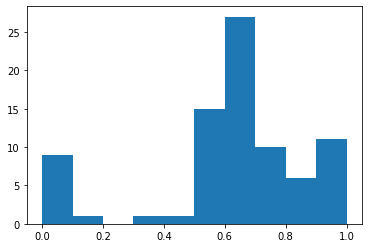

In [ ]:
clust_coef = [nx.clustering(g, v) for v in g.nodes()]
plt.hist(clust_coef)
plt.show()

In [ ]:
pathlengths = []

for v in g.nodes():
    spl = dict(nx.single_source_shortest_path_length(g, v))
    for p in spl:
        pathlengths.append(spl[p])
print(f"average shortest path length: {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length-paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

average shortest path length: 2.43639080889221

length-paths
0 81
1 1074
2 1814
3 1388
4 810
5 180
6 6


In [ ]:
close = nx.closeness_centrality(g)
print("id =", max(close, key=close.get))
print("max closeness centrality =", close[max(close, key=close.get)])

id = 289797558
max closeness centrality = 0.46736386584926076


In [ ]:
pr = nx.pagerank(g)
pr_sort = sorted(pr, key=pr.get, reverse=True)
for i in pr_sort:
  print(i, pr[i])

289797558 0.022886492439879072
334940037 0.021777704132716715
99727622 0.020500678908865054
160367081 0.02016715133282462
71213401 0.019586871256252514
155811528 0.018829999012185978
157555864 0.018690700650198545
168120793 0.018620377349827015
74269505 0.018370367610965103
174343971 0.018354349594136427
72496224 0.018072200125786076
150586434 0.01780457774777298
68474465 0.01753655558427994
203582609 0.017474712395152404
194588802 0.01681630669514238
332521237 0.016604405570038016
289133984 0.016512151442685613
189927388 0.01627003862969525
96115510 0.016105885500031253
249214888 0.016047628529083844
96331475 0.015733337207636058
179195229 0.015563979023524832
172959174 0.015451851012677655
72323949 0.01534929676887086
171871581 0.01530966841164175
144265143 0.015269398753855605
185821111 0.014882281735596683
189082800 0.01456520708708425
121095313 0.014408857382279372
33247405 0.014026359442729999
97098404 0.013698865375268422
52510397 0.013576044838019186
145355705 0.013453029423742

In [ ]:
cliques = list(nx.find_cliques(g))
len(cliques)

311

In [ ]:
clique_sizes = [len(i) for i in cliques]
print(max(clique_sizes))

10


In [ ]:
max_cliques = []
for c in cliques:
  if len(c) == 10:
    max_cliques.append(c)

In [ ]:
len(max_cliques)

36

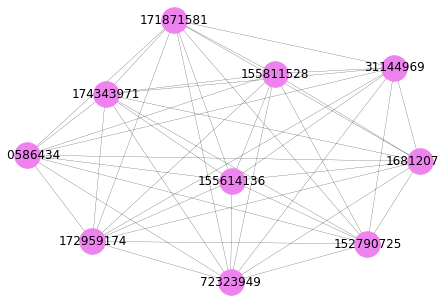

In [ ]:
S = g.subgraph(max_cliques[0])
networkx.draw(S, node_size=650, with_labels=True, width=0.2, node_color='violet')

In [ ]:
k_core_g = nx.k_core(g)
len(list(k_core_g))

29

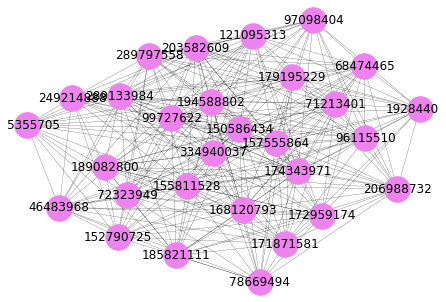

In [ ]:
networkx.draw(k_core_g, node_size=650, with_labels=True, width=0.2, node_color='violet')

In [ ]:
k_core_g = nx.k_core(S)
len(list(k_core_g))

29

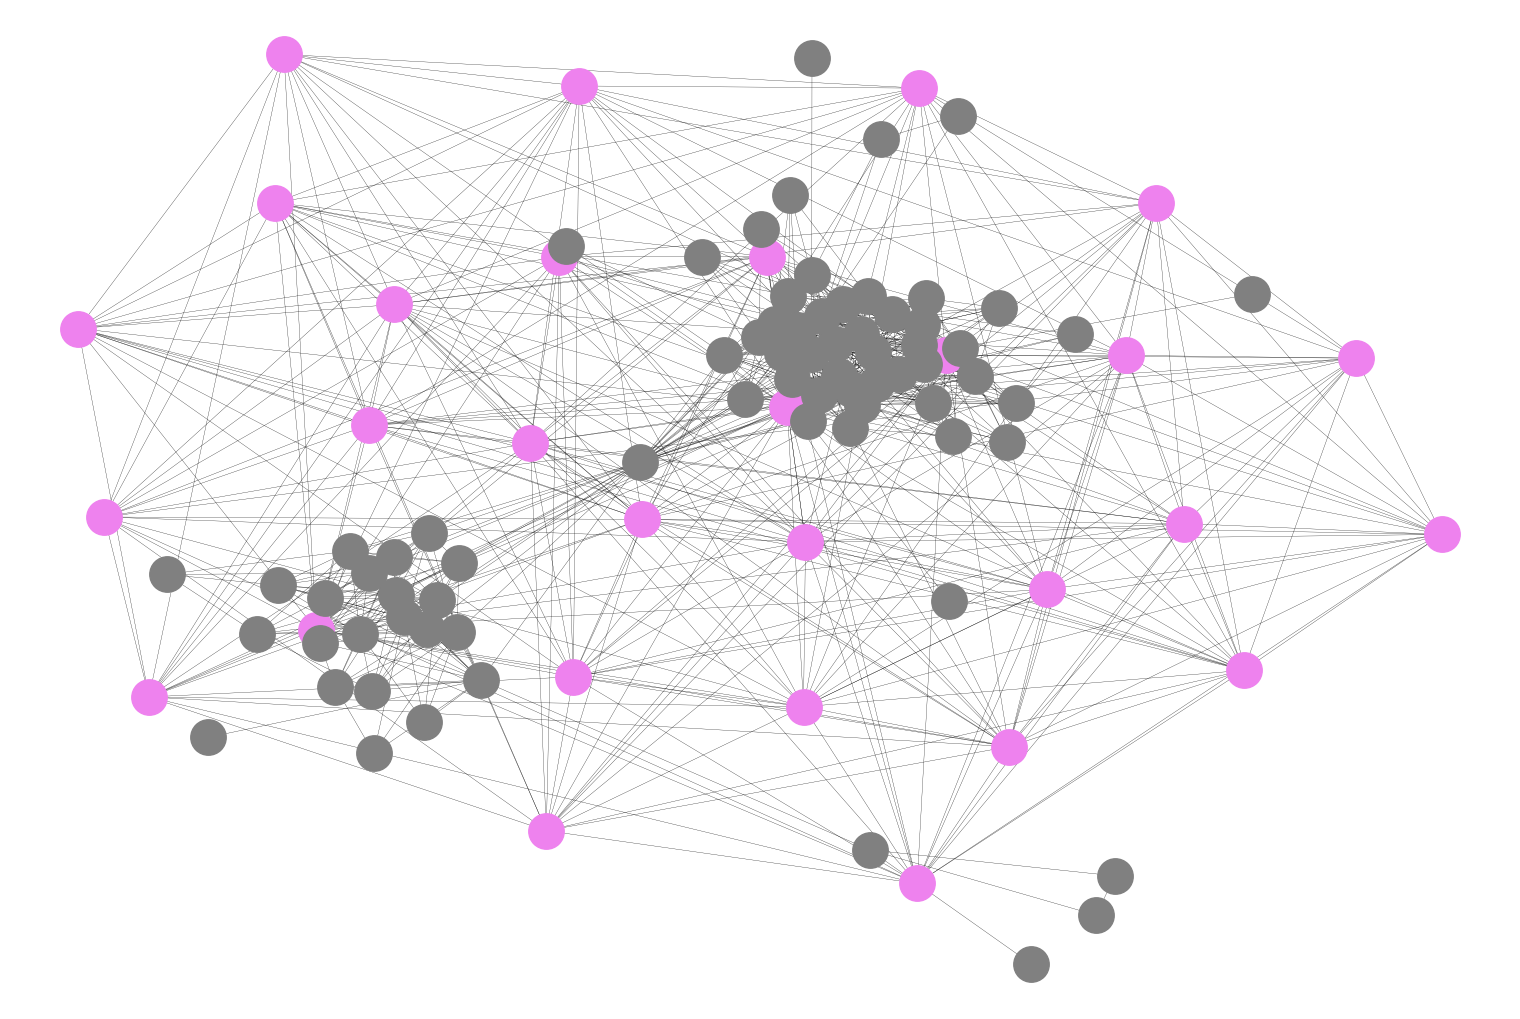

In [ ]:
plt.figure(figsize=(15, 10))
networkx.draw(k_core_g, node_size=650, with_labels=False, width=0.2, node_color='violet')
networkx.draw(S, node_size=650, with_labels=False, width=0.2, node_color='grey')

In [ ]:
nx.number_of_nodes(g)

95

In [ ]:
nk = nx.number_of_nodes(g) - 29
k_plex = nx.k_core(g, k=nk)
len(list(k_plex))

0

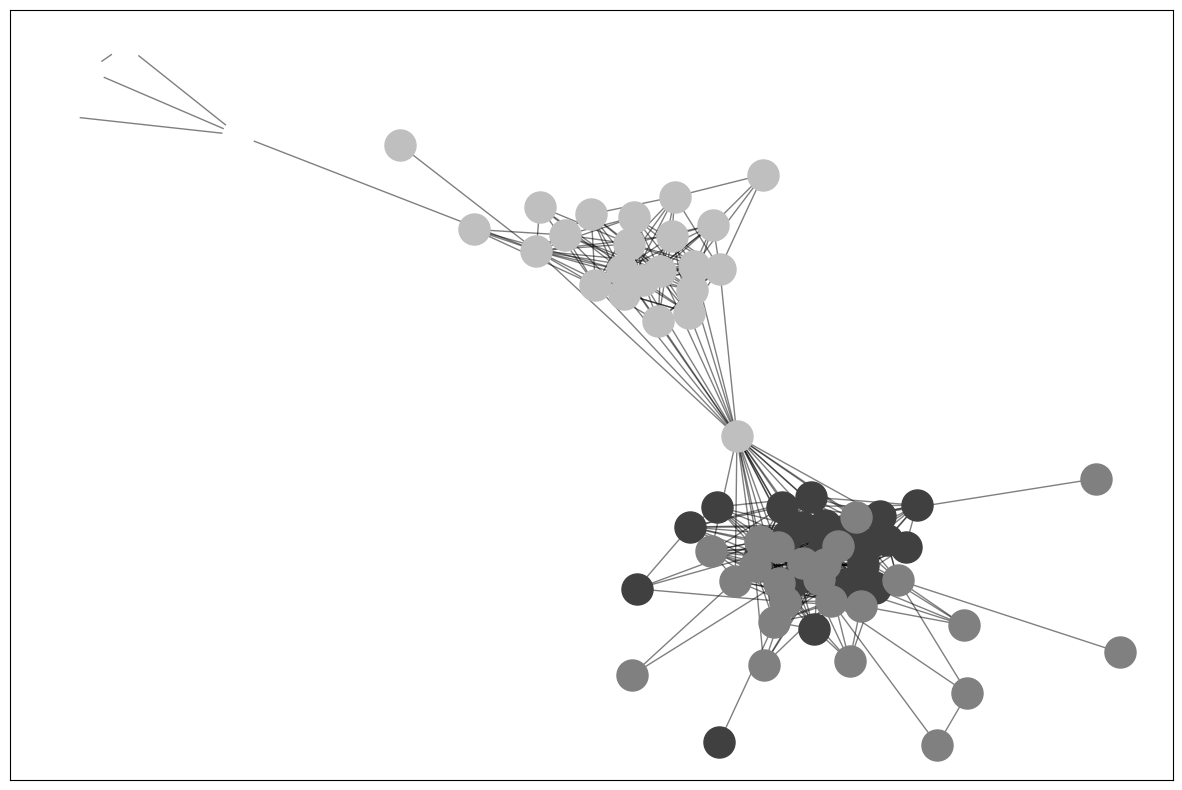

In [ ]:
import community
import networkx as nx
import matplotlib.pyplot as plt

#compute the best partition
partition = community.best_partition(S)

size = float(len(set(partition.values())))
pos = nx.spring_layout(S)
count = 0.
plt.figure(figsize=(15, 10))
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(S, pos, list_nodes, node_size = 500,
                                node_color = str(count / size))

nx.draw_networkx_edges(S,pos, alpha=0.5)
plt.show()

In [ ]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [ ]:
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(S), key=len, reverse=True)
# Count the communities
print(f"The graph has {len(communities)} communities.")

The graph has 3 communities.


In [ ]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)            

In [ ]:
 # Set node and edge communities
set_node_community(S, communities)
set_edge_community(S)

node_color = [get_color(S.nodes[v]['community']) for v in S.nodes]

# Set community color for edges between members of the same community (internal) 
# and intra-community edges (external)
external = [(v, w) for v, w in S.edges if S.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in S.edges if S.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

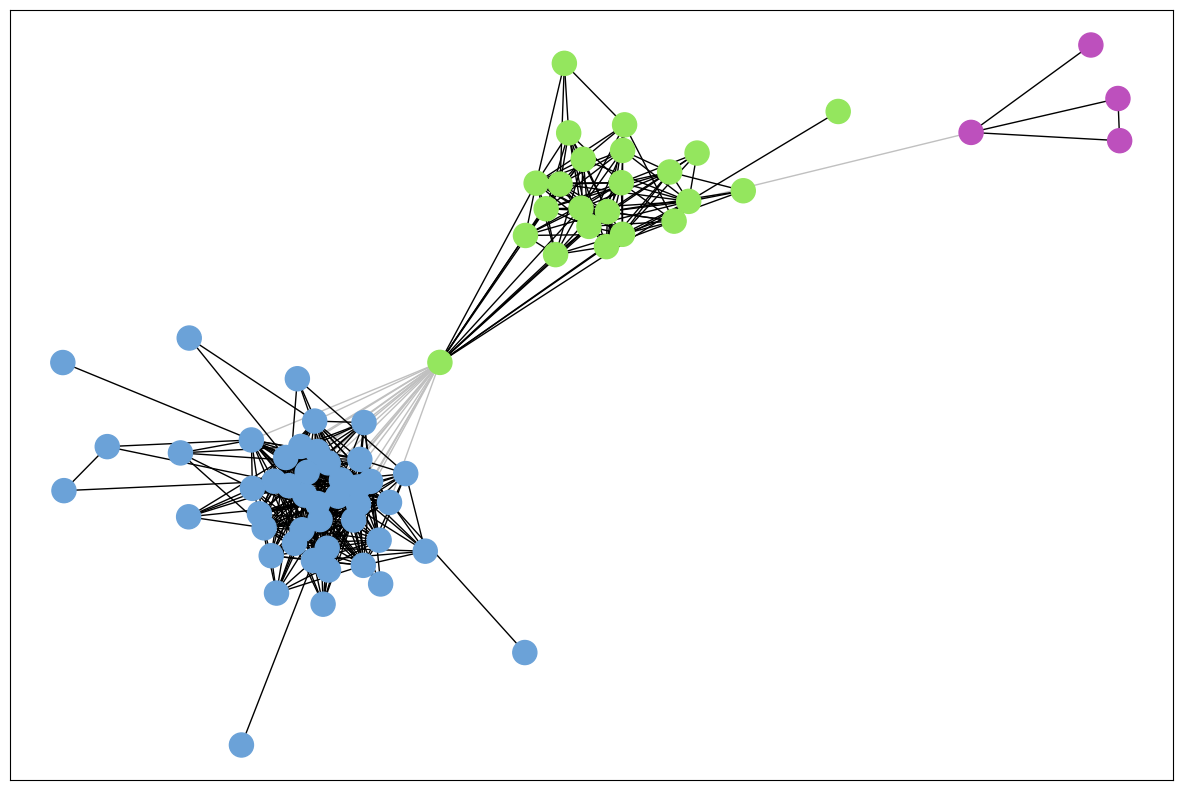

In [ ]:
karate_pos = nx.spring_layout(S)

plt.rcParams.update({'figure.figsize': (15, 10)})

# Draw external edges
fig.set_facecolor('white')
nx.draw_networkx(
    S,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    S,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color, with_labels=False)

In [ ]:
result = nxcom.girvan_newman(S)
communities = next(result)
print(f"The graph has {len(communities)} communities.")

The graph has 2 communities.


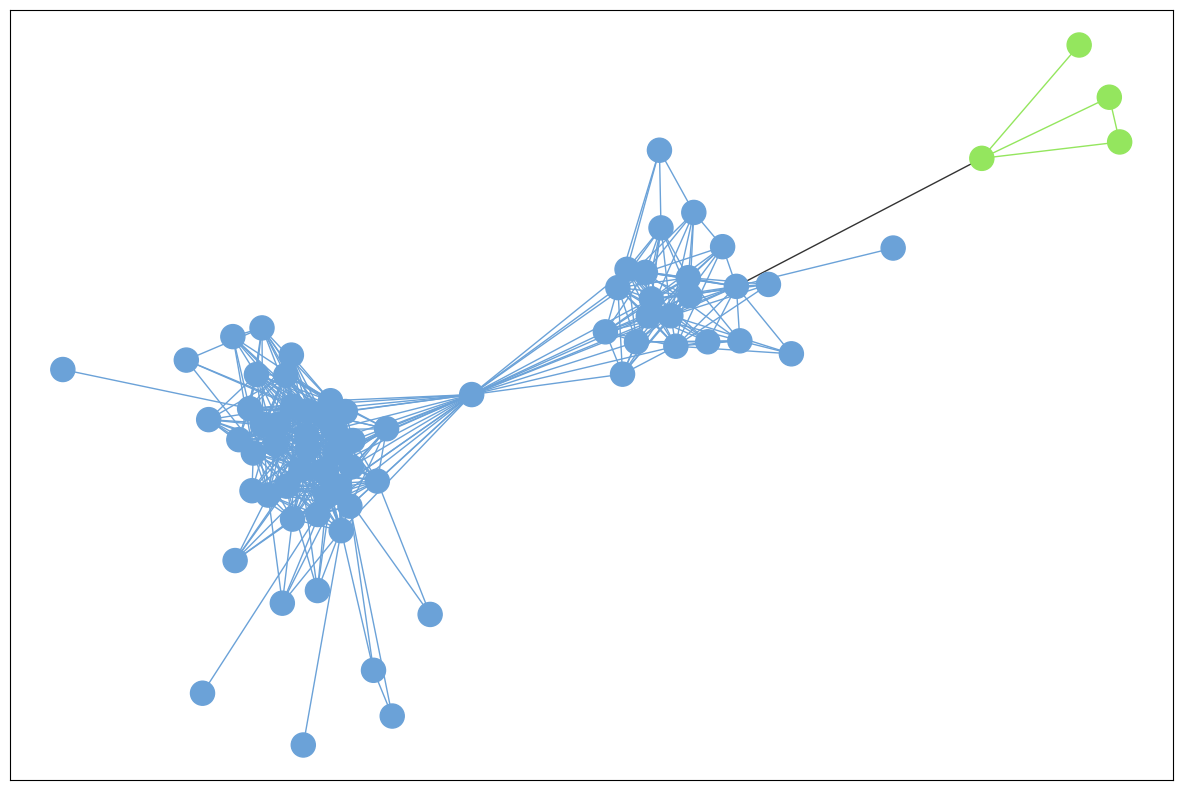

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(S, communities)
set_edge_community(S)

# Set community color for nodes
node_color = [get_color(S.nodes[v]['community']) for v in S.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in S.edges if S.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in S.edges if S.edges[v, w]['community'] > 0]
internal_color = [get_color(S.edges[e]['community']) for e in internal]

karate_pos = nx.spring_layout(S)
# Draw external edges
nx.draw_networkx(
    S, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    S, pos=karate_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color, with_labels=False)

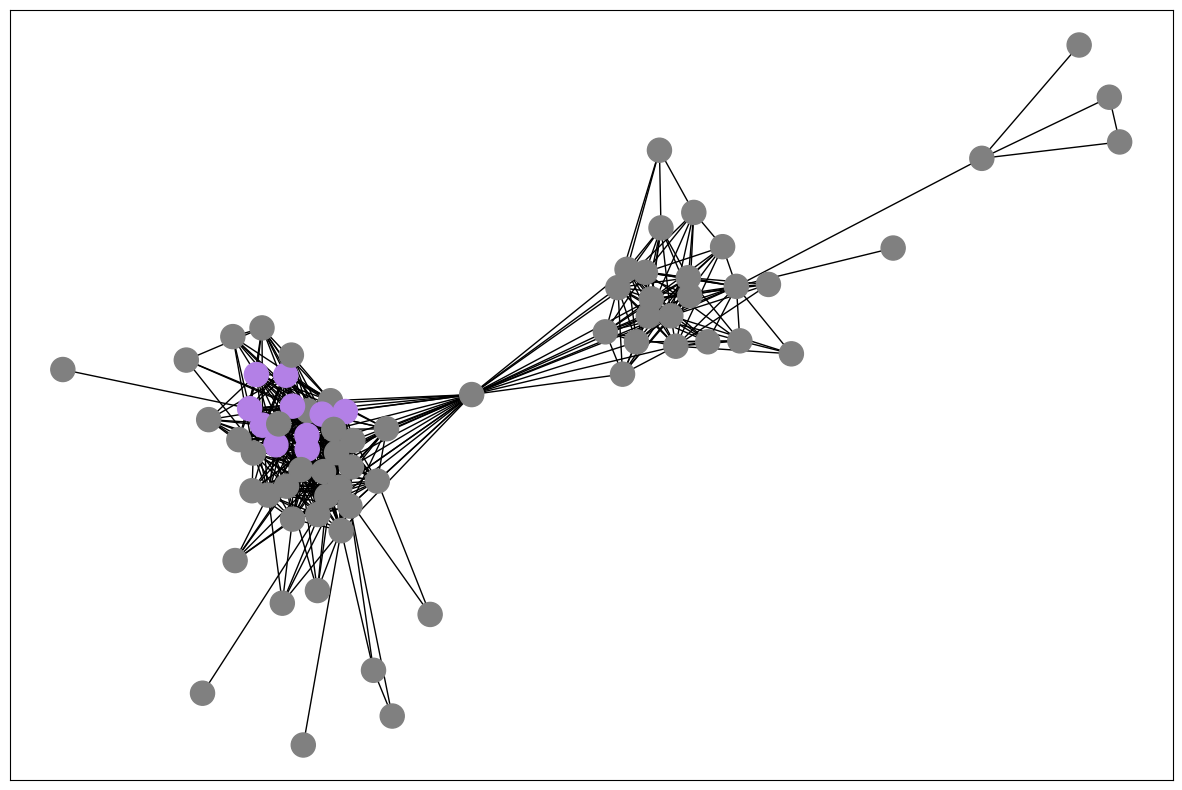

In [ ]:
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    cliques = list(nx.find_cliques(S))
    max_clique = max(cliques, key=len)
    node_color = [(0.5, 0.5, 0.5) for v in S.nodes()]
    for i, v in enumerate(S.nodes()):
        if v in max_clique:
            node_color[i] = (0.7, 0.5, 0.9)
    nx.draw_networkx(S, node_color=node_color, pos=karate_pos, with_labels=False)